In [34]:
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier

In [35]:
d = pd.read_csv('cars.csv')
d[0:10]

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7
5,Subaru,Outback,automatic,silver,132449,2011,gasoline,False,gasoline,2.5,...,True,False,False,False,True,False,True,True,True,67
6,Subaru,Forester,automatic,black,318280,1998,gasoline,False,gasoline,2.5,...,True,False,False,True,True,False,False,True,True,307
7,Subaru,Legacy,automatic,silver,350000,2004,gasoline,False,gasoline,2.5,...,True,True,False,False,False,False,False,False,True,73
8,Subaru,Outback,automatic,grey,179000,2010,gasoline,False,gasoline,2.5,...,True,True,True,True,True,True,True,True,True,87
9,Subaru,Forester,automatic,silver,571317,1999,gasoline,False,gasoline,2.5,...,True,True,False,False,True,False,False,False,True,43


In [36]:

X = d[['transmission','odometer_value','year_produced','engine_fuel']].values

X[0:10]


array([['automatic', 190000, 2010, 'gasoline'],
       ['automatic', 290000, 2002, 'gasoline'],
       ['automatic', 402000, 2001, 'gasoline'],
       ['mechanical', 10000, 1999, 'gasoline'],
       ['automatic', 280000, 2001, 'gasoline'],
       ['automatic', 132449, 2011, 'gasoline'],
       ['automatic', 318280, 1998, 'gasoline'],
       ['automatic', 350000, 2004, 'gasoline'],
       ['automatic', 179000, 2010, 'gasoline'],
       ['automatic', 571317, 1999, 'gasoline']], dtype=object)

In [37]:
d['manufacturer_name'], mn = pd.factorize(d['manufacturer_name'],sort=True)
d['transmission'], tr = pd.factorize(d['transmission'],sort=True)
d['engine_fuel'], od = pd.factorize(d['engine_fuel'],sort=True)
d['has_warranty'], wr = pd.factorize(d['has_warranty'],sort=True)
d

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,45,Outback,0,silver,190000,2010,3,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,45,Outback,0,blue,290000,2002,3,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,45,Forester,0,red,402000,2001,3,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,45,Impreza,1,blue,10000,1999,3,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,45,Legacy,0,black,280000,2001,3,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,8,300,0,silver,290000,2000,3,False,gasoline,3.5,...,True,False,False,True,True,False,False,True,True,301
38527,8,PT Cruiser,1,blue,321000,2004,0,False,diesel,2.2,...,True,False,False,True,True,False,False,True,True,317
38528,8,300,0,blue,777957,2000,3,False,gasoline,3.5,...,True,False,False,True,True,False,False,True,True,369
38529,8,PT Cruiser,1,black,20000,2001,3,False,gasoline,2.0,...,True,False,False,False,False,False,False,False,True,490


In [38]:
X=['transmission','odometer_value','year_produced','engine_fuel']
X1=d[X]
X1

,transmission,odometer_value,year_produced,engine_fuel
0,0,190000,2010,3
1,0,290000,2002,3
2,0,402000,2001,3
3,1,10000,1999,3
4,0,280000,2001,3
...,...,...,...,...
38526,0,290000,2000,3
38527,1,321000,2004,0
38528,0,777957,2000,3
38529,1,20000,2001,3


In [39]:

y=d["has_warranty"]
y[0:10]


0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: has_warranty, dtype: int64

In [40]:
class_names=['False','True']
class_names

['False', 'True']

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X1,y, test_size=0.3 ,random_state=3)


In [42]:
carTree = DecisionTreeClassifier(criterion="entropy", max_depth=4)
carTree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [43]:
carTree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [44]:
yhat = carTree.predict(x_test)

In [45]:
print (yhat [0:10])
print (y_test [0:10])

[0 0 0 0 0 0 0 0 0 0]
25759    0
445      0
33863    0
14180    0
37555    0
9834     0
2605     0
22669    0
2928     0
28708    0
Name: has_warranty, dtype: int64


In [46]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, yhat))

DecisionTrees's Accuracy:  0.996280276816609


In [47]:


import pandas as pd
from IPython.display import Image
from io import StringIO
import pydotplus
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split



In [48]:
def plot_decision_tree(clf, features, classes):
    dot_data = StringIO()
    tree.export_graphviz(clf, out_file=dot_data, feature_names=features, class_names=classes, filled=True, rounded=True, special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return Image(graph.create_png())
    
    

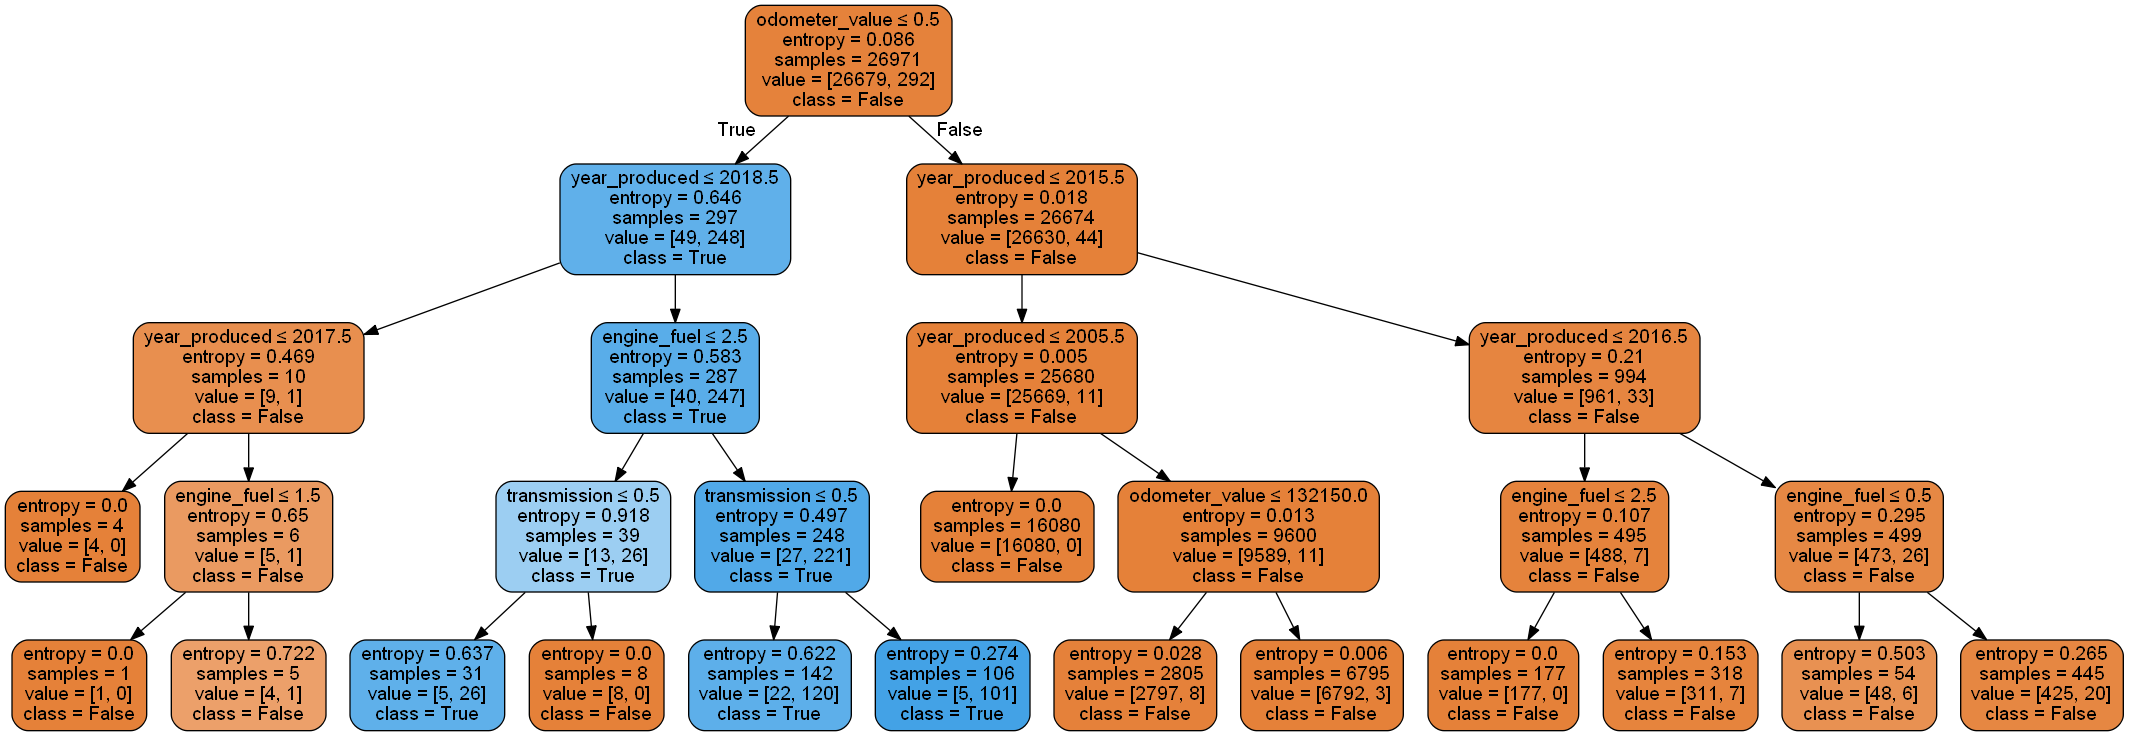

In [49]:
plot_decision_tree(carTree,X, class_names)